Before you turn in your homework, make sure everything runs as expected.

Make sure you execute every single code cell, in order, filling with your solutions in any place that says `# YOUR CODE HERE`, and always DELETE the line that says:

```python
raise NotImplementedError()
```

The purpose of this line is to tell you if you forgot to answer a question (it will throw an error if the line is there)

**IMPORTANT:**

* **DO NOT DELETE ANY CELL** and do not change the title of the Notebook.

* Use the same variable names as the ones written in the questions; otherwise, the tests will fail.

* Before you turn in your homework, make sure everything runs as expected: restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Fill your name below:

In [1]:
name = "Yinfeng Ding"

# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

$$
\begin{cases}
\frac{dh}{dt} = v\\
(m_s+m_p) \frac{dv}{dt} = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{cases}
$$

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 350 \frac{m}{s}$ is the exhaust speed

$C_D = 0.21 $ is the drag coefficient

$m_{po} = 150 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

<img src="figures/burn_rate.png" width="600px">

that is,

$$
\begin{equation}
    \dot{m}_p \left( t \right) =
    \begin{cases}
        20 & \quad \text{if} \quad t < 4 \\
        0 & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$

Using RK2 (midpoint) technique with a time-step size of $\Delta t=0.05s$, implement a code (in this notebook) to calculate the altitude and velocity of the rocket from launch until crash down.

_Hint:_ To compute the mass of the remaining propellant at a given time $t$, you can use the function `integrate.quad()` from the SciPy package.
(Check the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) to understand how to use it.)

---

## Implement your solution (40 points)

Implement your solution in this section.
You can use as many code cells as you want.

In [2]:
# Import your libraries.

# YOUR CODE HERE
import math
import numpy
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

In [3]:
# YOUR CODE HERE
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [4]:
# Set parameters.
g = 9.81
ms = 50.0
𝜌 = 1.091
r = 0.5
A = math.pi * (r**2)
ve = 350.0
CD = 0.21
mp0 = 150.0

# Set initial conditions.
v0 = 0.0
h0 = 0.0

In [5]:
# Define the formula of propellant change over time
def mp(t):
    if t > 4:
        a = 150 - 80 - 0 * t
        return a
    else:
        a = 150 - 20 * t
        return a

def mp_dot(t):
    if t > 4:
        b = 0
        return b
    else:
        b = 20
        return b 

In [6]:
def rhs_phugoid(t, u, ms, g, 𝜌, A, ve, CD, mp, mp_dot):
    h, v = u
    rhs = numpy.array([v,
                      -g + mp_dot(t) * ve / (ms + mp(t)) - 0.5 * 𝜌 * v * numpy.abs(v) * A * CD / (ms + mp(t))])
    return rhs

In [7]:
def rk2_step(t, u, f, dt, *args):
    u_star = u + 0.5 * dt * f(t, u, *args)  #from Euler, t = ndt, first dt
    u_new = u + dt * f(t + 0.5 * dt, u_star, *args) # begin at dt + 0.5dt, ndt+0.5dt
    return u_new

In [8]:
# Create the time grid.
T = 100.0
dt = 0.05
N = int(T / dt) + 1

# Create arrays to store the solution at each time step.
u_rk2 = numpy.empty((N, 2))

# Set the initial conditions.
u_rk2[0] = numpy.array([h0, v0])

In [9]:
# Time integration with RK2 method.
for n in range(N - 1):
    u_rk2[n + 1] = rk2_step(n*dt, u_rk2[n], rhs_phugoid, dt, ms, g, 𝜌, A, ve, CD, mp, mp_dot)

In [10]:
# Create an empty list that will contain the solution of time. t = n * dt (0, T, dt)
t = []

for n in range(N - 1):
    t.append(n * dt)

t.append(T)
t = numpy.array(t)

In [11]:
# Get the glider's position over the time.
h_rk2 = u_rk2[:, 0]
v_rk2 = u_rk2[:, 1]

---

## Assessment (60 points)

Answer questions in this section.

Do not try to delete or modify empty code cells that are already present.
For each question, provide your answer in the cell **just above** the empty cell.
(This empty cell contains hidden tests to assert the correctness of your answer and cannot be deleted.)
Pay attention to the name of the variables we ask you to create to store computed values; if the name of the variable is misspelled, the test will fail.

In [12]:
# Import module to check answers.
import mooc

ImportError: bad magic number in 'mooc': b'3\r\r\n'

**Q1. (10 points)** Using Matplotlib, plot the history of the altitude and velocity of the rocket over time.

Don't forget to include axis labels and a legend, if necessary, to your Matplotlib figure.

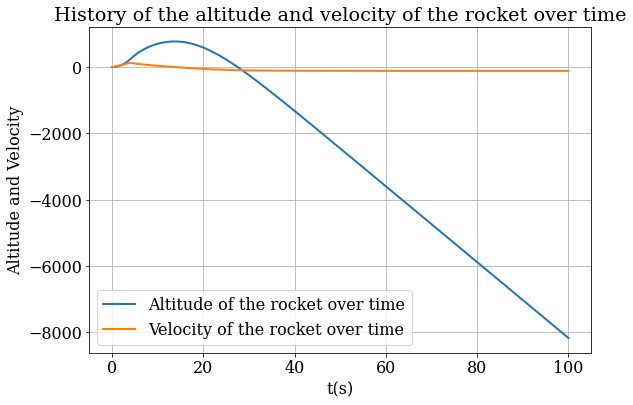

In [13]:
# YOUR CODE HERE
pyplot.figure(figsize=(9.0, 6.0))
pyplot.title('History of the altitude and velocity of the rocket over time')
pyplot.xlabel('t(s)')
pyplot.ylabel('Altitude and Velocity')
pyplot.grid()
pyplot.plot(t, h_rk2, color = 'C0', linestyle = '-', linewidth = 2, label = 'Altitude of the rocket over time')
pyplot.plot(t, v_rk2, color = 'C1', linestyle = '-', linewidth = 2, label = 'Velocity of the rocket over time')
pyplot.legend();

**Q2. (5 points)** At time $t=15.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket? 

_Instructions:_

* Store the value of the remaining propellant using a variable called `m_p`.
You can call the function `mooc.check('hw1_answer1', m_p)` to check you got the correct answer. The function will print `'Good job!'` if you got it right, `'Try again!'` otherwise.

In [14]:
# YOUR CODE HERE
m_p = mp(15.2)
print(m_p)
mooc.check('hw1_answer1', m_p)

70.0


NameError: name 'mooc' is not defined

**Q3. (15 points)** What is the maximum speed of the rocket in $\frac{m}{s}$? At what time does this occur (in seconds)? What is the altitude at this time (in meters)?

_Instructions:_

* Store the maximum speed in the variable `vmax`, check your answer with `mooc.check('hw1_answer2', vmax)`.
* Store the time in `t_vmax`, check your answer with `mooc.check('hw1_answer3', t_vmax)`.
* Store the altitude in the variable `h_vmax`, check your answer with `mooc.check('hw1_answer4', h_vmax)`.

In [15]:
# YOUR CODE HERE
vmax = max(u_rk2[:, 1])
print(vmax)


126.74103191459848


**Q4. (10 points)** What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

_Instructions:_

* Store the maximum altitude in the variable `hmax`, check your answer with `mooc.check('hw1_answer5', hmax)`.
* Store the time in the variable `t_hmax`, check your answer with `mooc.check('hw1_answer6', t_hmax)`.

In [16]:
# YOUR CODE HERE
hmax = max(u_rk2[:, 0])
print(hmax)



771.8314766882667


**Q5. (20 points)** At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

The time and velocity of the impact should be linearly interpolated at altitude $h = 0$.

_Instructions:_

* Store the time of impact in the variable `t_impact`, check your answer with `mooc.check('hw1_answer7', t_impact)`.
* Store the impact velocity in the variable `v_impact`, check your answer with `mooc.check('hw1_answer8', v_impact)`.

In [19]:
# YOUR CODE HERE
# Get the index of the first negative element of h_rk2
idx_negative_rk2 = numpy.where(h_rk2 < 0.0)[0]
if len(idx_negative_rk2) == 0:
    idx_ground_rk2 = N - 1
    print('[RK2] Rocket has not touched ground yet!')
else:
    idx_ground_rk2 = idx_negative_rk2[0]

# Speed and time when impacting the ground
n_ground1 = idx_ground_rk2
t_ground1 = dt * n_ground1
v_ground1 = u_rk2[n_ground1, 1]
print('t1', t_ground1)
print('v1', v_ground1)

# Speed and time dt before impacting the ground
n_ground2 = n_ground1 - 1
t_ground2 = dt * n_ground2
v_ground2 = u_rk2[n_ground2, 1]
print('v2', v_ground2)

h_ground1 = u_rk2[n_ground1, 0]
h_ground2 = u_rk2[n_ground2, 0]
print('h1', h_ground1)
print('h2', h_ground2)

# Converted to a linear problem, using the ratio to find the velocity of the point of impact
v_impact = -v_ground2 + h_ground2 * (-v_ground1 + v_ground2) / (-h_ground1 + h_ground2)
print('v_impact', v_impact)

# Converted to a linear problem, using the ratio to find the time of the point of impact
t_impact = t_ground2 + h_ground2 * dt / (-h_ground1 + h_ground2)
print('t_imact', t_impact)

t1 27.55
v1 -94.76242798382563
v2 -94.60802111597513
h1 -1.3402959116020376
h2 3.393979061019251
v_impact 94.71871466026498
t_imact 27.535844760609038


---

## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}

